random forest for refined dataset
- imputed with mean value of each column
- eliminate outliers and leverges after normalized

some observations:
- the model contructed by not normalized dataset is as good as the normalized dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree

import scipy

In [3]:
plt.rcParams["figure.figsize"] = (15, 10)

## load data

In [4]:
pth_data = './processed_data/train_refine_not_norm.csv'
df_refine = pd.read_csv(pth_data)

In [5]:
df_refine

height  weight  gender        bmi   age      rh  heart_rate  \
0       1.60    52.5     1.0  20.507812  24.0  62.985   83.000000   
1       1.77    58.0    -1.0  18.513199  23.0  48.702   79.000000   
2       1.71    64.0    -1.0  21.887076  27.0  47.990   79.333991   
3       1.77    58.0    -1.0  18.513199  23.0  52.445   92.000000   
4       1.77    58.0    -1.0  18.513199  23.0  56.396   79.333991   
...      ...     ...     ...        ...   ...     ...         ...   
2282    1.77    90.0    -1.0  28.727377  28.0  59.397   72.000000   
2283    1.71    64.0    -1.0  21.887076  27.0  47.190   81.000000   
2284    1.66    57.0     1.0  20.685150  25.0  52.940   79.333991   
2285    1.69    75.0    -1.0  26.259585  24.0  47.010   79.333991   
2286    1.74    65.0    -1.0  21.469150  23.0  53.640   79.333991   

      stress_level  skin_temp       eda   TC   TS   Clo  Act  env_temp  
0        19.500000  32.003449  0.176971  4.0  4.0  0.61  1.1    75.942  
1         2.000000  30.933000  0.038821  4.0  4.0  0.36  1.1    77.378  
2        33.000000  33.199000  0.475946  4.0  4.0  0.61  1.0    75.484  
3        53.000000  30.431000  0.009851  4.0  4.0  0.36  1.0    77.203  
4        80.000000  30.087000  0.003597  4.0  4.0  0.36  1.0    77.902  
...            ...        ...       ...  ...  ...   ...  ...       ...  
2282     33.000000  31.353000  0.254152  4.0  4.0  0.36  1.1    74.467  
2283     32.111013  32.003449  0.667239  4.0  4.0  0.74  1.0    73.753  
2284      2.000000  30.854000  0.008716  4.0  4.0  0.54  1.0    76.703  
2285     32.111013  31.300000  0.025626  3.0  4.0  0.36  1.0    75.484  
2286     32.111013  34.150000  0.131368  4.0  7.0  0.54  0.8    79.151  

[2287 rows x 15 columns]

In [6]:
df_refine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   height        2287 non-null   float64
 1   weight        2287 non-null   float64
 2   gender        2287 non-null   float64
 3   bmi           2287 non-null   float64
 4   age           2287 non-null   float64
 5   rh            2287 non-null   float64
 6   heart_rate    2287 non-null   float64
 7   stress_level  2287 non-null   float64
 8   skin_temp     2287 non-null   float64
 9   eda           2287 non-null   float64
 10  TC            2287 non-null   float64
 11  TS            2287 non-null   float64
 12  Clo           2287 non-null   float64
 13  Act           2287 non-null   float64
 14  env_temp      2287 non-null   float64
dtypes: float64(15)
memory usage: 268.1 KB


## data process

### X & y

In [7]:
X_data = df_refine[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'TC', 'TS', 'Clo', 'Act']]

In [8]:
X_cols_name = X_data.columns

In [9]:
y_data = df_refine['env_temp']

### normalize

In [10]:
X_array_normalize, X_norm = normalize(X_data, axis=0, return_norm=True)

In [11]:
X_data = pd.DataFrame(X_array_normalize, columns=X_cols_name)

In [12]:
X_data

height    weight    gender       bmi       age        rh  heart_rate  \
0     0.019628  0.017184  0.020911  0.019573  0.020420  0.025272    0.021584   
1     0.021714  0.018984 -0.020911  0.017669  0.019569  0.019541    0.020544   
2     0.020978  0.020948 -0.020911  0.020889  0.022973  0.019256    0.020631   
3     0.021714  0.018984 -0.020911  0.017669  0.019569  0.021043    0.023924   
4     0.021714  0.018984 -0.020911  0.017669  0.019569  0.022628    0.020631   
...        ...       ...       ...       ...       ...       ...         ...   
2282  0.021714  0.029458 -0.020911  0.027417  0.023823  0.023833    0.018723   
2283  0.020978  0.020948 -0.020911  0.020889  0.022973  0.018935    0.021064   
2284  0.020364  0.018657  0.020911  0.019742  0.021271  0.021242    0.020631   
2285  0.020732  0.024549 -0.020911  0.025062  0.020420  0.018862    0.020631   
2286  0.021346  0.021275 -0.020911  0.020490  0.019569  0.021523    0.020631   

      stress_level  skin_temp       eda        TC        TS       Clo  \
0         0.010714   0.020906  0.003065  0.021456  0.018949  0.023861   
1         0.001099   0.020206  0.000672  0.021456  0.018949  0.014082   
2         0.018132   0.021687  0.008242  0.021456  0.018949  0.023861   
3         0.029121   0.019878  0.000171  0.021456  0.018949  0.014082   
4         0.043956   0.019654  0.000062  0.021456  0.018949  0.014082   
...            ...        ...       ...       ...       ...       ...   
2282      0.018132   0.020481  0.004401  0.021456  0.018949  0.014082   
2283      0.017644   0.020906  0.011555  0.021456  0.018949  0.028947   
2284      0.001099   0.020155  0.000151  0.021456  0.018949  0.021123   
2285      0.017644   0.020446  0.000444  0.016092  0.018949  0.014082   
2286      0.017644   0.022308  0.002275  0.021456  0.033160  0.021123   

           Act  
0     0.021038  
1     0.021038  
2     0.019126  
3     0.019126  
4     0.019126  
...        ...  
2282  0.021038  
2283  0.019126  
2284  0.019126  
2285  0.019126  
2286  0.015300  

[2287 rows x 14 columns]

In [13]:
X_norm

array([  81.51502009, 3055.17450402,   47.8225888 , 1047.78619992,
       1175.31017183, 2492.26763506, 3845.44044694, 1819.98324996,
       1530.85355015,   57.74552235,  186.42424735,  211.09713404,
         25.56422109,   52.28613583])

## random forest (1st stry)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1208)

In [15]:
rfr = RandomForestRegressor()

In [16]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
y_pred = rfr.predict(X_test)

In [18]:
# mean squared error
mean_squared_error(y_test, y_pred)

1.4571292851109185

In [19]:
# R2 score
r2_score(y_test, y_pred)

0.7111491697209731

much better than the basic linear regression

## random forest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1208)

In [21]:
rfr = RandomForestRegressor()

In [22]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = rfr.predict(X_test)

In [24]:
# mean squared error
mean_squared_error(y_test, y_pred)

1.4762820320417038

In [25]:
# R2 score
r2_score(y_test, y_pred)

0.7073524669097601

## tuning hyperparameter
cross validation

### define hyper-param range for random search

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [30]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

### random search
Use the random grid to search for best hyperparameters (approximately)
- 5-fold cross validation

In [31]:
rfr = RandomForestRegressor()

In [52]:
rfr_random = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=5, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='r2')

In [53]:
# Fit the random search model
# Use R^2 as score method
rfr_random.fit(X_data, y_data)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='r2', verbose=2)

In [54]:
rfr_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [55]:
rfr_random.best_score_

0.7277905311556718

In [56]:
rfr_random_mse = RandomizedSearchCV(estimator=rfr, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=5, 
                               verbose=2, 
                               random_state=1208, 
                               n_jobs=-1,
                               scoring='neg_mean_squared_error')

In [57]:
# Fit the random search model
# Use MSE as score method
rfr_random_mse.fit(X_data, y_data)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1208, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rfr_random_mse.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [59]:
rfr_random_mse.best_score_

-1.3277964964289644

both result in a same hyper-params!

### Grid Search
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [65]:
param_grid = {
    'n_estimators': [300, 400, 500],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3],
    'max_depth': [16, 18, 20, 22, 24]
}

In [66]:
rfr = RandomForestRegressor()

In [67]:
grid_search = GridSearchCV(estimator = rfr, 
                           param_grid = param_grid, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2,
                           scoring='r2')

In [68]:
grid_search.fit(X_data, y_data)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  5.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [16, 18, 20, 22, 24],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 400, 500]},
             scoring='r2', verbose=2)

In [69]:
grid_search.best_params_

{'max_depth': 18,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [70]:
grid_search.best_score_

0.7306404886603011

### validate the result

In [71]:
best_params = grid_search.best_params_

In [72]:
rfr = RandomForestRegressor()

In [73]:
rfr.set_params(**best_params)

RandomForestRegressor(max_depth=18, max_features=3, n_estimators=500)

In [76]:
rfr_cv_mse = cross_val_score(rfr, X_data, y_data, scoring='neg_mean_squared_error', cv=5)

In [83]:
rfr_cv_mse

array([-1.28354873, -1.25498902, -1.33914301, -1.40578632, -1.37254896])

In [77]:
np.abs(rfr_cv_mse.mean())

1.3312032060609635

In [78]:
rfr_cv_r2 = cross_val_score(rfr, X_data, y_data, scoring='r2', cv=5)

In [82]:
rfr_cv_r2

array([0.72207184, 0.7412262 , 0.7302408 , 0.72465456, 0.72188273])

In [79]:
np.abs(rfr_cv_r2.mean())

0.7280152242380937

## final model

In [80]:
rfr_best = RandomForestRegressor()
rfr_best.set_params(**best_params)

RandomForestRegressor(max_depth=18, max_features=3, n_estimators=500)

In [81]:
rfr_best.fit(X_data, y_data)

RandomForestRegressor(max_depth=18, max_features=3, n_estimators=500)

## visualization
pick a tree from the forest to visualize

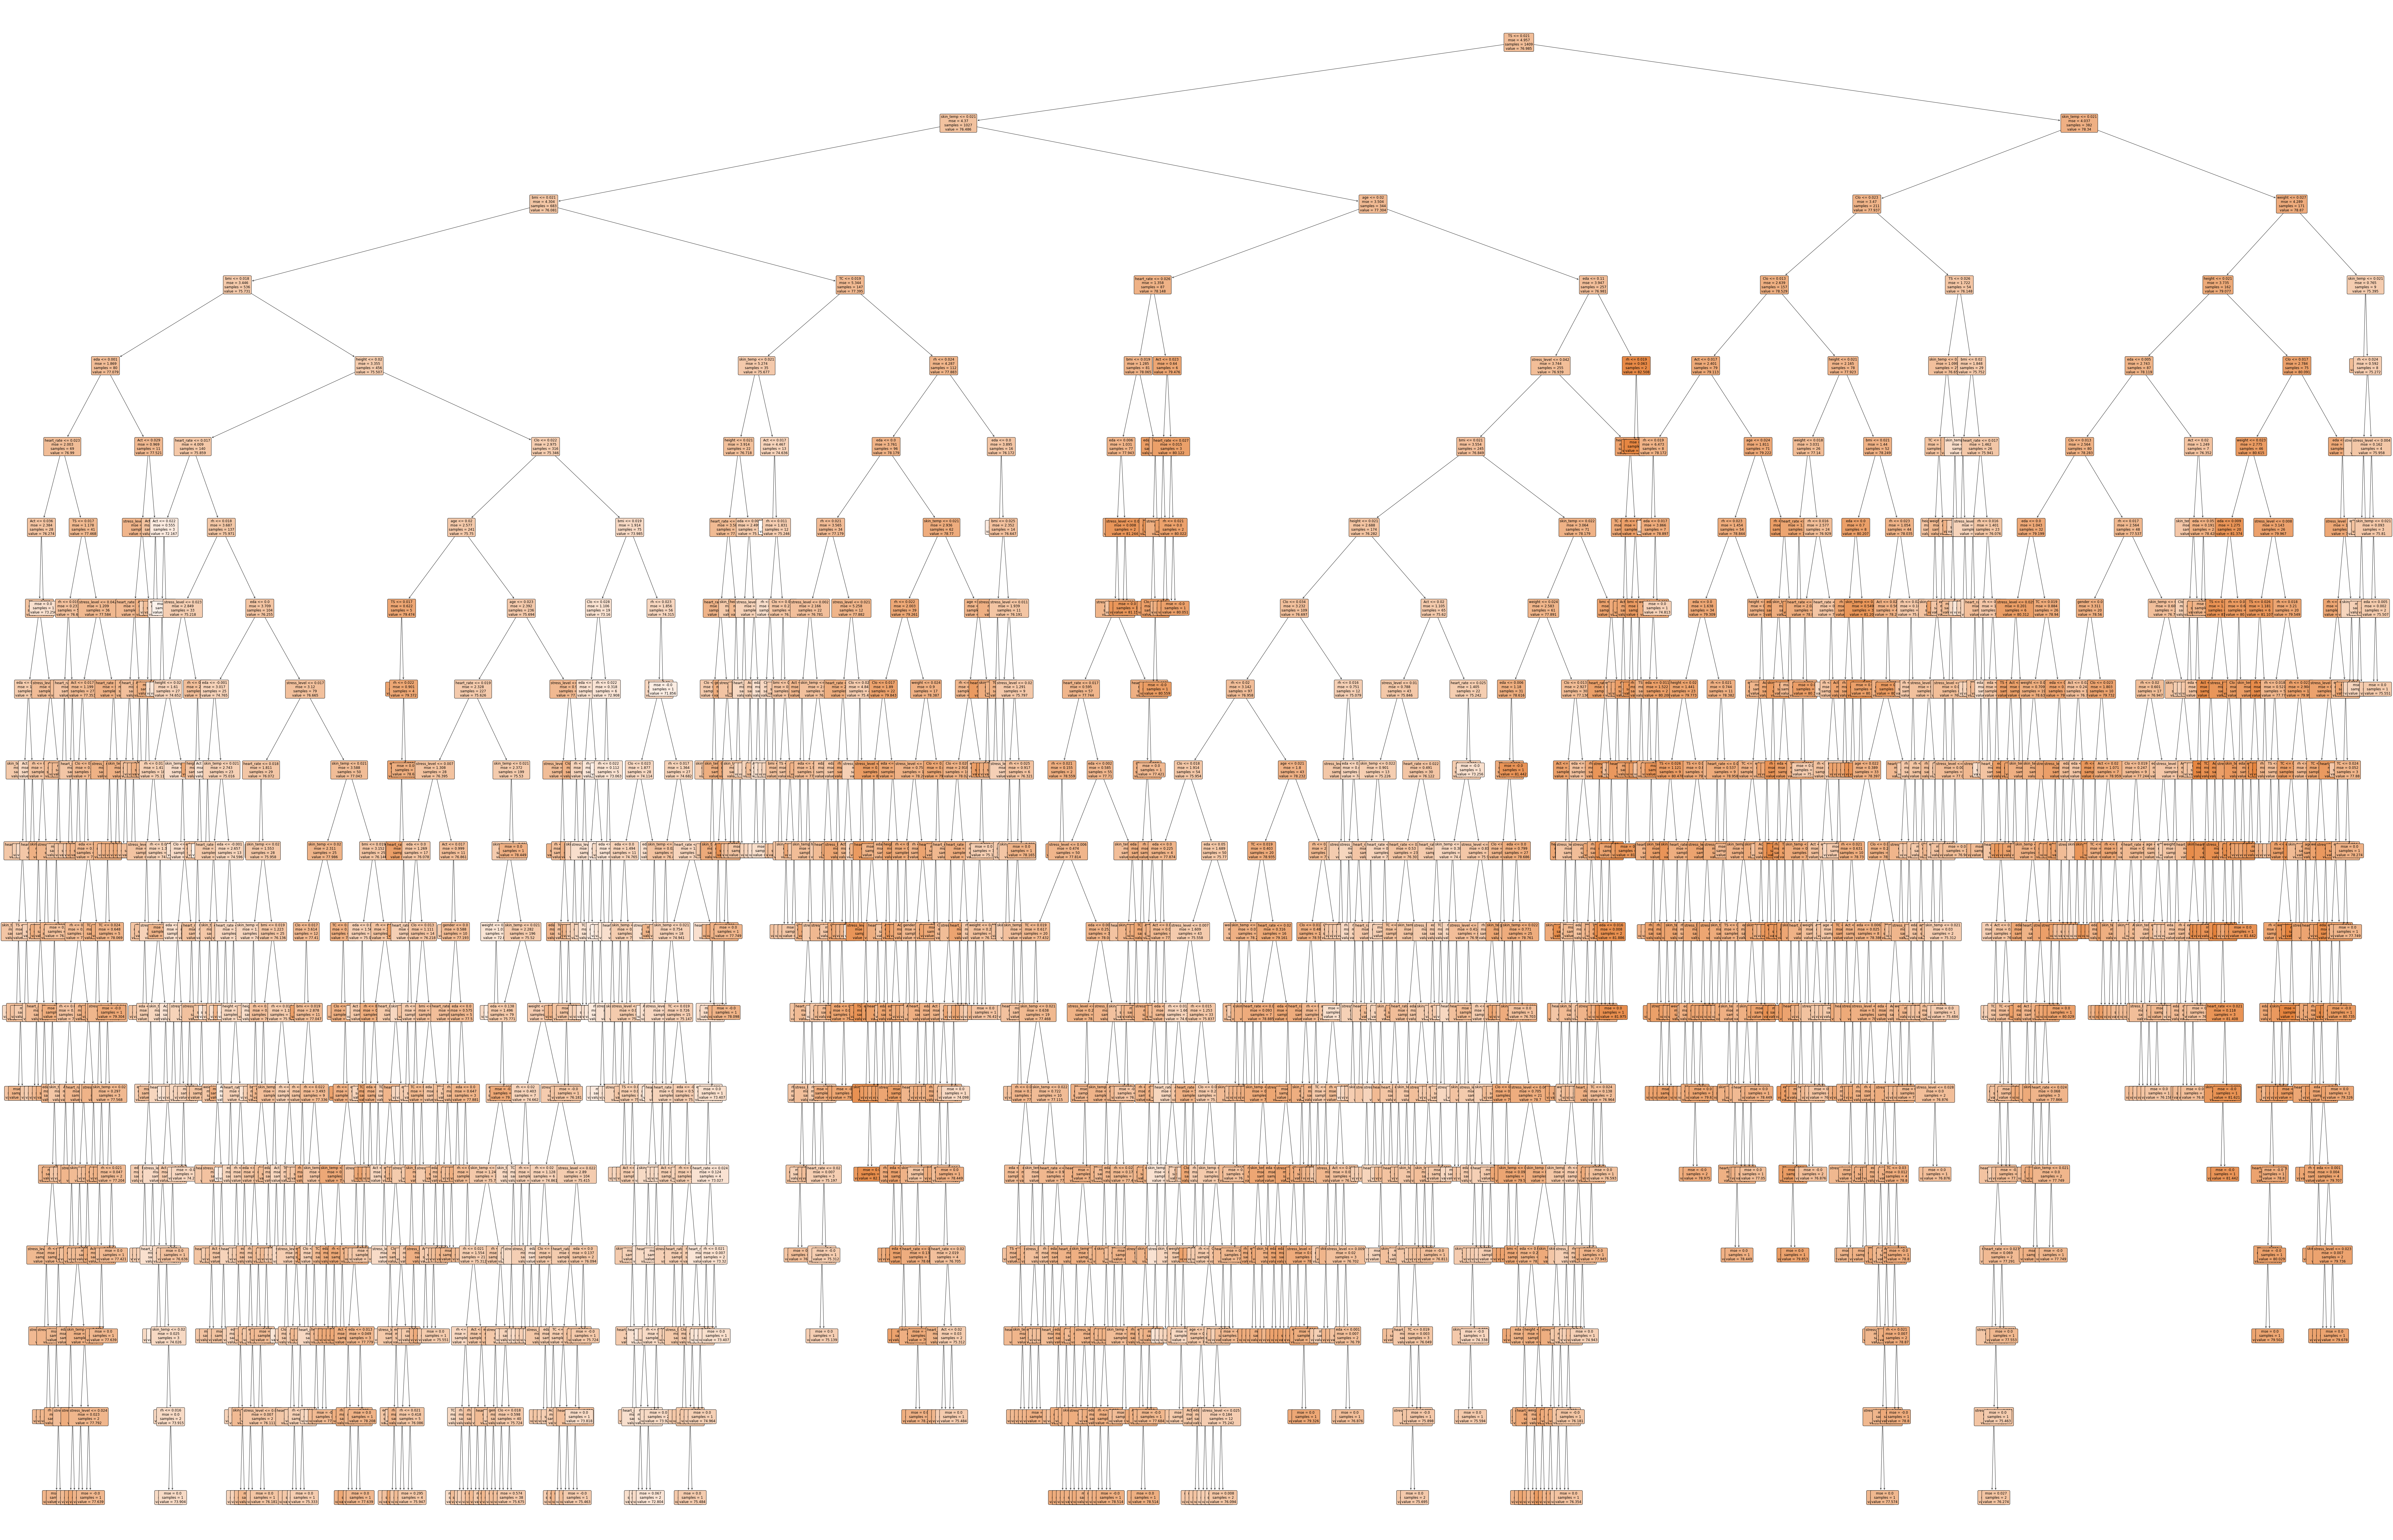

In [88]:
plt.rcParams["figure.figsize"] = (150, 100)
a_tree = tree.plot_tree(rfr_best.estimators_[0], 
                        feature_names=X_data.columns, 
                        rounded=True,
                        filled=True,
                        fontsize=12)